In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
df = pd.read_csv('UsArrests.csv')

In [3]:
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape #df is a small dataset

(50, 5)

In [5]:
df.isnull().sum() #no missing values

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


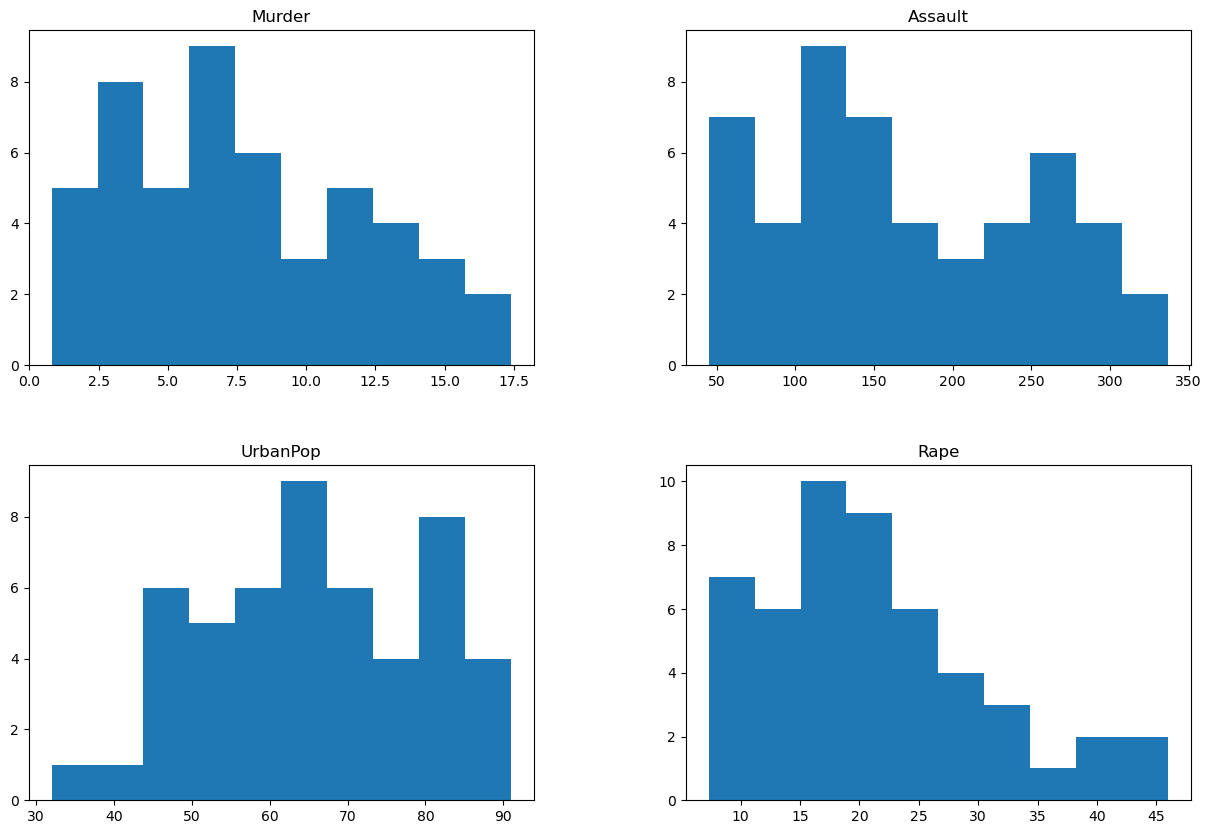

In [11]:
df.hist(grid = False, figsize=(15, 10));

# Correlation Analysis

In [12]:
countries = df.index
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

<AxesSubplot:>

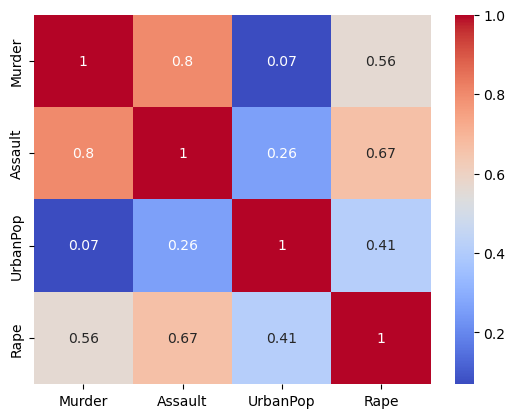

In [13]:
sns.heatmap(corr_df, annot = True, cmap="coolwarm")

From the correlation matrix, there seems to be a lot of correlations so this data set is a good candidate for PCA.


# PCA

In [106]:
from sklearn.decomposition import PCA

X = df.drop(["City"],axis=1).values

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [15]:
# Feature importance
#pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.041704,0.044822
1,Assault,0.995221,0.058760
2,UrbanPop,0.046336,0.976857
3,Rape,0.075156,0.200718


From this table, it seems the most important feature for principal component 1 is Assault. However, this is clearly because the data was not standardized and the values in assault are higher relative to other features.

# Standardise it!

In [166]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [165]:
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [17]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


After standardisation of data, the feature importances of the 4 features are looking more balanced.

Text(0.5, 1.0, 'Cumulative Explained Variance')

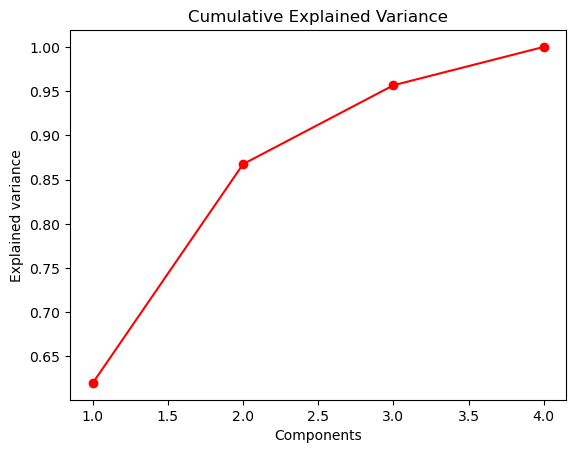

In [18]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red', marker = 'o')
plt.title("Cumulative Explained Variance")

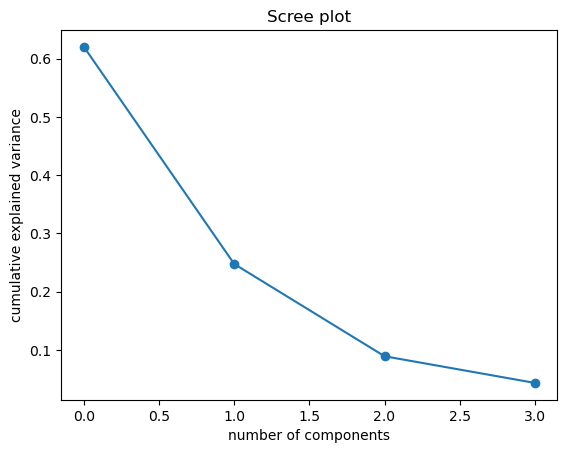

In [19]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_, marker = 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

Plotting scree plot, it seems that 3 components explain the variance of the data fully, so it will be optimal to use n_components = 3 for our PCA.

In [167]:
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [178]:
#X_std_trans

# K means

In [187]:
from sklearn.cluster import KMeans

In [185]:
inertia = []

for k in range(1, 11): #maximum K value is 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)  
    x = kmeans.inertia_
    inertia.append(x)

print(inertia)


[355807.8215999999, 96399.02814449911, 47964.26535714284, 34728.62935714285, 24417.023523809527, 18768.00066666666, 15606.797749999998, 13436.82553174603, 12424.501309523806, 10250.311785714282]


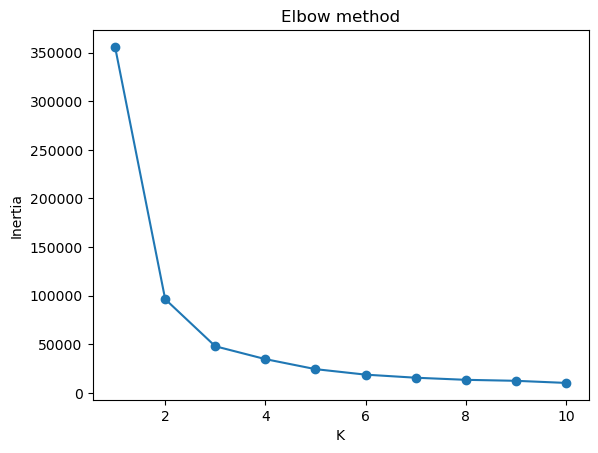

In [188]:
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


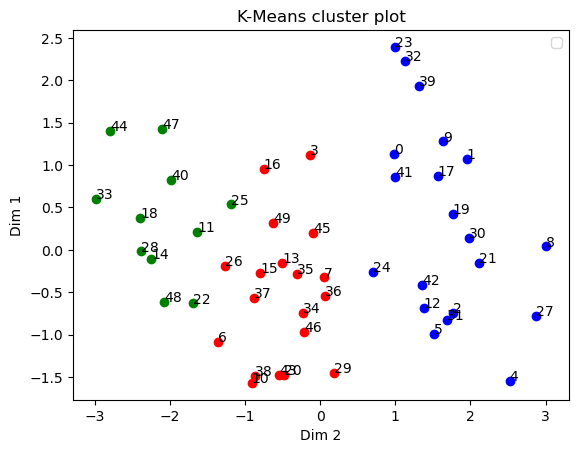

In [186]:
# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_



# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = countries[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend();

In [181]:
# Groups - translate to readable names
City = df.index

clusters = pd.DataFrame()


In [182]:
group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(City)[group0_indices]
group1 = np.array(City)[group1_indices]
group2 = np.array(City)[group2_indices]


print("Group 0: {}\n\n".format([df.loc[x]["City"] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x]["City"] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x]["City"] for x in group2]))

Group 0: ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Kentucky', 'Massachusetts', 'Nebraska', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']


Group 1: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


Group 2: ['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']




In [189]:
# Fit the PCA with standandized data 3.
pca = PCA(n_components=3)

# obtain components
principal_components = pca.fit_transform(X_std)

# Change components into a dataframe
pca_df = pd.DataFrame(principal_components) #, columns = ['PC1', 'PC2', 'PC3']
pca_df.head()

,0,1,2
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


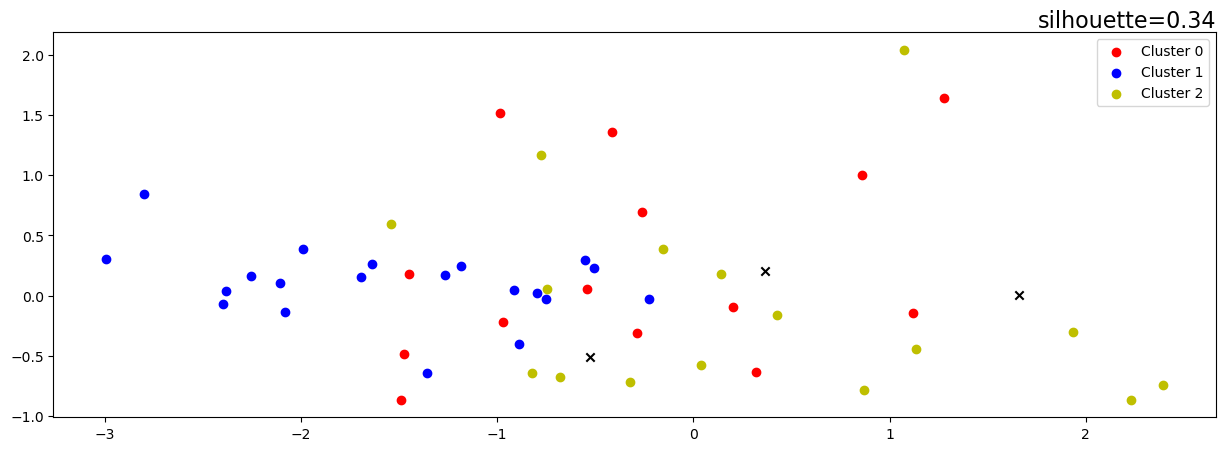

In [190]:
plt.figure(figsize=(15,5))

# Scatter plots for predictions equaling to zero
plt.scatter(pca_df[pred == 0][1], pca_df[pred == 0][0], c = "r", label = 'Cluster {}'.format(0))
plt.scatter(kmeans.cluster_centers_[0, 1], kmeans.cluster_centers_[0, 0], marker='x', c = 'black')

# Scatter plots for predictions equaling to 1
plt.scatter(pca_df[pred == 1][0], pca_df[pred == 1][2], c = "b", label = 'Cluster {}'.format(1))
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 2], marker='x', c = 'black')

# Scatter plots for predictions equaling to 2
plt.scatter(pca_df[pred == 2][1], pca_df[pred == 2][2], c = "y", label = 'Cluster {}'.format(2))
plt.scatter(kmeans.cluster_centers_[2, 1], kmeans.cluster_centers_[2, 2], marker='x', c = 'black')
score = round(silhouette_score(pca_df, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.legend();

For KMeans, the silhouette score is 0.34. Let us compare it with the silhouette score of Agglomerative clustering and see if it is better.

# Agglomerative clustering

In [58]:
import scipy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

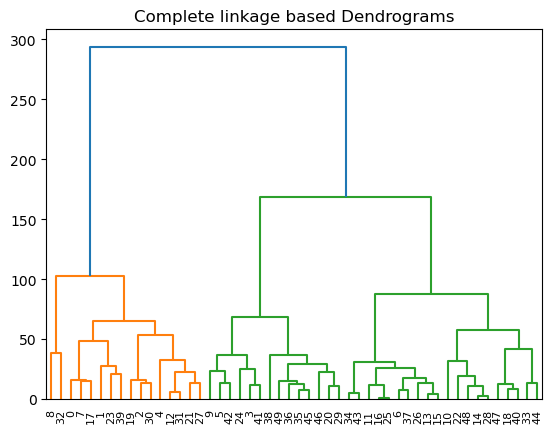

In [59]:
scipy.spatial.distance.pdist(pca_df, metric='euclidean')
plt.title("Complete linkage based Dendrograms")  
dend = dendrogram(linkage(pca_df, method='complete'))

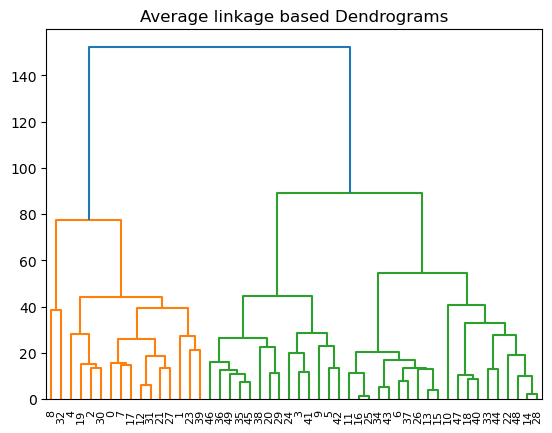

In [60]:
scipy.spatial.distance.pdist(pca_df, metric='euclidean')
plt.title("Average linkage based Dendrograms")  
dend = dendrogram(linkage(pca_df, method='average'))

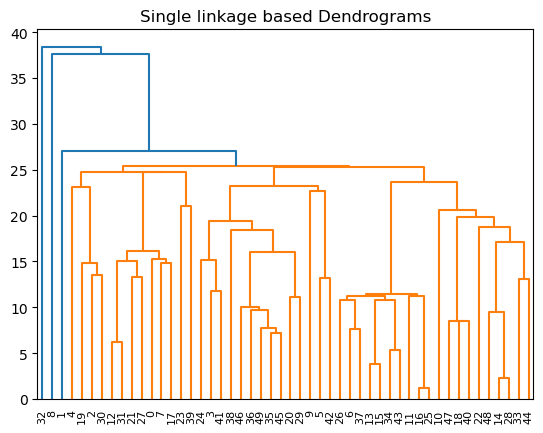

In [61]:
scipy.spatial.distance.pdist(pca_df, metric='euclidean')
plt.title("Single linkage based Dendrograms")  
dend = dendrogram(linkage(pca_df, method='single'))

The most balanced dendrogram among these three seems to be the one with complete linkage. Working with that dendrogram, we get n_cluster = 4.

In [62]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
pred = cluster.fit_predict(pca_df)
pred

array([1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [183]:
df['cluster labels'] = pred

In [184]:
df[['City', 'cluster labels']]

,City,cluster labels
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1
7,Delaware,2
8,Florida,2
9,Georgia,0


In [65]:
from sklearn.metrics import silhouette_score
score = round(silhouette_score(pca_df, pred, metric='euclidean'),2)
score

0.5

The silhouette score in agglomerative clustering is better, so this may be a better model than K Means for this data set.